# DawR Notebook #12: Statisticians Rule the World 

_Lesson Objectives_

1.  To learn basic statistical modelling techniques

You have editing privileges to this document.  This is *NOT* a statistics course.  We will only learn when to use each technique, how to implement in R, and how to analyze the output.  


## Linear Regression ... Again

"The bigger they are, the harder they fall."  Below is the weight (kg) of 5 different objects and the force (kg*m/s<sup>2</sup>) with which they hit the ground (taking into consideration there is air resistance).

| weight | force |
| :-: | :-: | 
| 45.3 | 443.94 |
| 22.6 | 221.48 |
| 34.5 | 338.10 |
| 0.91 | 8.82 |
| 38.6 | 378.29 |

We will create a scatterplot based on this data.  <font color=#C7B8EA>Accurately label the axis and give an appropriate title.</font>  

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
# create a data frame
DF = data.frame(weight = c(45.3, 22.6,34.5,0.91,38.6), force = c(443.94,221.48,338.10,8.82,378.29))
# create scatterplot
ggplot(data = DF, aes(x = weight, y = force)) + geom_point()  + xlab(" ") + ylab(" ") + ggtitle(" ")

*Linear Regression* helps us answer 

*    is there really a linear relationship between the explanatory and response variables in the population (all objects) or might the pattern we see in the scatterplot plausibly arise just by chance?

*   what is the rate of change that relates the response variable to the explanatory variable in the population (all objects), including the margin of error for our estimate of the slope?

We use the common method called the *Least Squares Method*.



In [ ]:
# find the least squares information
lsq = lm(DF$force ~ DF$weight) # the formula is response/dependent variable ~ explanatory/independent variable
summary(lsq) # returns a bunch of significant information


The summary provides us with a best fit line under "Coefficients" > "Estimate".  The value next to (Intercept) is our y-intercept, and the value in the cell beneath that is our slope.  Thus, our best fit line is

$$\hat{y} = 9.8022 x - 0.0828$$

For bullet point 1:

We have the default hypothesis "There is no linear relationship between the two variables."  We test to see if this is false, or that there is *some* linear relationship.

\
In the summary, on the bottom right, there is a *p-value* = 7.675e-13 = 0.0000000000007675.  A p-value represents the probability the default hypothesis is true based on our sample data.  Since the p-value is so small, this means our alternative hypothesis is more likely to be true than the default hypothesis.  We say:

"We have statistically significant evidence that there is a linear relationship between the variables weight and force."

\
Moreover, the summary gives us residuals, or errors between the data points and the best fit least squares line.  Since these errors are small, i.e. close to 0, we know that a line fits the data really well.

\
For bullet point 2:

What we want to know is how well does this line represent the relationship between the two variables overall (not just for our particular sample).  In statistics, we use something called a confidence interval.  

In [ ]:
confint(lsq, level = 0.95)

In the last row of the output, it says that the overall slope is between 9.8001 and 9.8045.  This is based on the estimated slope from our current data.  We say:

"We are 95% confident that the slope representing the relationship between these two variables is in (9.8001, 9.8045)."

The margin of error is `abs(9.8022 - 9.8045)`.

## Chi-Square Test ($χ^2$-Test)

How are schools doing? The nonprofit group Public Agenda conducted telephone interviews with a stratified sample of parents of high school children. There were 202 black parents, 206 Hispanic/Latino parents, 190 Asian parents, and 201 white parents. One question asked was "Are the high schools in your state doing an excellent, good, fair, or poor job, or don't you know enough to say?"
The count of responses in each category is in the table below.

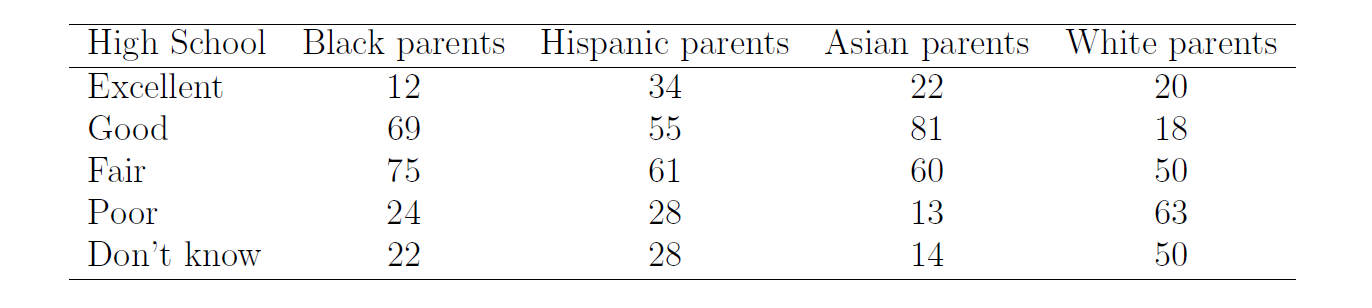

The *Chi-Square Test* helps us answer questions like

*    Are the differences in the distribution of responses for the four groups of parents statistically significant?  
*    What departures from the default hypothesis "no relationship between ethnic group and HS opinion" contribute most to the value of the chi-square statistic?  

The chi-square test is most useful when we want to analyze the relationship between two categorical variables on one group of indiviuals (test of independence --- which we learn about here) *or* when we want to analyze the differences between groups on one categorical variable (test of homogeneity [link text](https://sites.williams.edu/bklingen/files/2012/02/R-code-for-inference-about-several-proportions.pdf)).

In [ ]:
#?chisq.test

In [ ]:
# remember that one time I said we'd never have to make a matrix? well we need it for chisq.test to work
obs = matrix(c(12, 34, 22, 20, 69, 55, 81, 18, 75, 61, 60, 50, 24, 28, 13, 63, 22, 28, 14, 50), nrow = 5, byrow = T)
# we also need these labels
colnames(obs) = c("Black", "Hispanic", "Asian", "White")
rownames(obs) = c("Excellent", "Good","Fair","Poor","Don't Know")

obs

In [ ]:
Xsq = chisq.test(obs)
Xsq

The results provide a p-value < 2.2e-16.  Just like for linear regression, the p-value represents the probability that the default hypothesis is correct.  For our example, that hypothesis is "The two variables are independent of one another."  Since the probability is so small, it is more likely that the alternative is correct "the two variables have a dependent relationship."  We say:

There is statistically significant evidence that there is a relationship between "Race" and "High School Rating".

\
Once this is established, we would like to know which categories in each variable caused this outcome.  We look at the residuals *expected counts - observed counts*

In [ ]:
Xsq$residuals

Based on the residuals, we see that the residuals furthest from 0 occur in the column for white parents, with Asian and Black parents having the next greatest influence on the results.

## ANalysis Of VAriance (ANOVA)

Does age influence hearing level?  Scientists randomly sampled 20 individuals and measured their hearing levels.  The table represents the data of hearing level (kHz) across differing age groups.

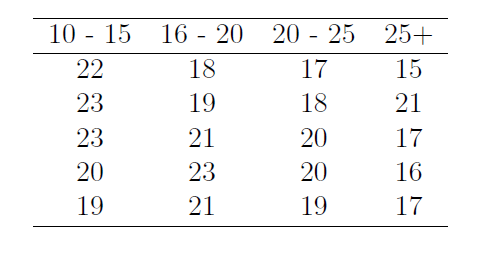

The *ANOVA test* will help answer questions like 

*   Is the evidence strong that there are differences in hearing level among the various groups?  
*   What departures from the default hypothesis "the population mean for each group is equal" contribute the most to the p-value?  

Anova test is mostly used to compare differences among groups on one quantitative variable.  That's what we'll explore today.

We look at bullet point #1 first.  The default hypothesis is that there is no difference in hearing level among the various groups.  We compare the means of the groups as a way to determine if there is a difference.

In [ ]:
# remember that one time I said we'd never have to make a matrix?
mat = matrix(c(22, 18, 17, 15, 23, 19, 18, 21, 23, 21, 20, 17, 20, 23, 20, 16, 19, 21, 19, 17), nrow = 5, byrow = T)
# once again we need labels for the columns
colnames(mat) = c("10 - 15", "16-20", "20 -25", "25+")
# we actually need a stacked table for the anova test function
table = as.data.frame(mat)
stak = stack(table)
# we label the two variables
names(stak) = c("hearing","age")
stak


In [ ]:
# we run the anova test, and we tell R which is the response and explanatory variables using a formula like for lm()
av1 = aov(hearing~age, data = stak); summary(av1)

In this output, the p-value is under the column Pr(>F).  The p-value represents the probability the default hypothesis is true.  Since it is small (not as small as the others we've seen, but still less than 2%, we can say:

"There is statistically significant evidence that there are differences among the age groups with respect to hearing level."

\
We explore those differences to better understand between which groups they lie.

In [ ]:
tk = TukeyHSD(av1); tk

In the left most column *$age*, the groups being compared are listed.  In the right most column *p adj*, a p-value is given.  The smaller the p-value, the more statistically significant the differences in hearing levels are for the two groups being compared.

\
<font color=#C7B8EA>Which groups have the most statistically significant results?</font>

In [ ]:
# we graph the results because we like visuals
plot(tk)

# the intervals that do NOT intersect the vertical line have the biggest differences
# does your selection above match?